# 1. logistics模型

![logistic model](./data/learn_WML_chapter_5_logistic.jpg "logistic model")

In [3]:
# code: comparison between logistic regression and perceptron

# import some package 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# prepare random data
def prepare_data(n1,mu1,variance1,n2,mu2,variance2):
    df1=pd.DataFrame(np.random.multivariate_normal(mu1,np.eye(2)*variance1,n1),columns=["x","y"])
    df2=pd.DataFrame(np.random.multivariate_normal(mu2,np.eye(2)*variance2,n2),columns=["x","y"])
    df1["type"]=1
    df2["type"]=-1
    df=pd.concat([df1,df2],ignore_index=True)
    return df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
def run_perceptron(train_set):
    # parameters initializaiton
    w0=w1=w2=0.0
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())
    # iteration
    paramhist=pd.DataFrame([[w0,w1,w2]],columns=["w0","w1","w2"])
    for i in range(30):
        for index,point in train_set.iterrows():
            x,y,type=point.x,point.y,point.type
            if type*(w0*bias+w1*x+w2*y)<=0:
                w0+=type*bias
                w1+=type*x
                w2+=type*y
    # compute error
    err=0.0
    for index,point in train_set.iterrows():
        x,y,type=point.x,point.y,point.type
        if type*(w0*bias+w1*x+w2*y)<=0:
            err+=1
    err_rate=err*100/len(train_set)
    
    return w0,w1,w2,err_rate
def run_logistic(train_set):
    w=np.array([[0],[0.1],[0.1]])
    phi=train_set[["x","y"]]
    phi["bias"]=1
    phi=phi.as_matrix(columns=["bias","x","y"])
    t=(train_set[["type"]]+1)*0.5  # change labels from 1,-1 to (1+1)*0.5=1,(-1+1)*0.5=0
    t=t.as_matrix()
    
    for i in range(30):
        y=np.array([])
        for line in phi:
            a=np.dot(line,w)
            y=np.append(y,[1.0/(1.0+np.exp(-a))])
        r=np.diag(y*(1-y))
        y=y[np.newaxis,:].T
        tmp1=np.linalg.inv(np.dot(np.dot(phi.T,r),phi))
        tmp2=np.dot(phi.T,(y-t))
        w_new=w-np.dot(tmp1,tmp2)
        if np.dot((w_new-w).T,(w_new-w))<0.001*np.dot(w.T,w):
            w=w_new
            break
        w=w_new
    # compute error
    err=0.0
    for index,point in train_set.iterrows():
        x,y,type=point.x,point.y,point.type
        type=type*2.0-1.0
        if type*(w0+w1*x+w2*y)<0:
            err+=1
    err_rate=err*100/len(train_set)
    
    return w[0],w[1],w[2],err_rate

def show_result(subplot,train_set,perceptron,logistic):
    train_set1=train_set[train_set["type"]==1]
    train_set2=train_set[train_set["type"]==-1]
    ymin,ymax=train_set.y.min()-5,train_set.y.max()+10
    xmin,xmax=train_set.x.min()-5,train_set.x.max()+10
    
    # data scatter
    subplot.set_xlim([xmin-1,xmax+1])
    subplot.set_ylim([ymin-1,ymax+1])
    subplot.scatter(train_set1.x,train_set1.y,marker="o",label=None)
    subplot.scatter(train_set2.x,train_set2.y,marker="x",label=None)
    
    linex=np.arange(xmin-5,ymax+5)
    # perceptron
    w0,w1,w2,err_rate=perceptron
    bias=0.5*(train_set.x.abs().mean()+train_set.y.abs().mean())
    w0=w0*bias
    liney=-linex*w1/w2-w0/w2 # line f(x,y)=0, where f(x,y)=w0+w1*x+w2*y
    subplot.plot(linex,liney,label="perceptron ERR {:.2f}%".format(err_rate),color="red")
    subplot.legend(loc=1)
    # logistic
    w0,w1,w2,err_rate=logistic
    liney=-linex*w1/w2-w0/w2 # line f(x,y)=0, where f(x,y)=w0+w1*x+w2*y
    subplot.plot(linex,liney,label="logistic ERR {:.2f}%".format(err_rate),color="blue")
    subplot.legend(loc=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


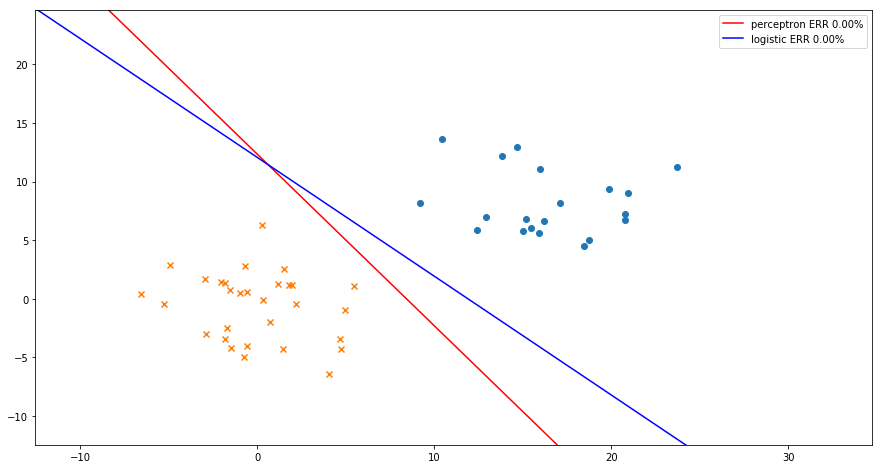

In [69]:
train_set=prepare_data(20,[15,10],10,30,[0,0],10)
perceptron=run_perceptron(train_set)
logistic=run_logistic(train_set)
fig=plt.figure(figsize=(15,8))
subplot=fig.add_subplot(1,1,1)
show_result(subplot,train_set,perceptron,logistic)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


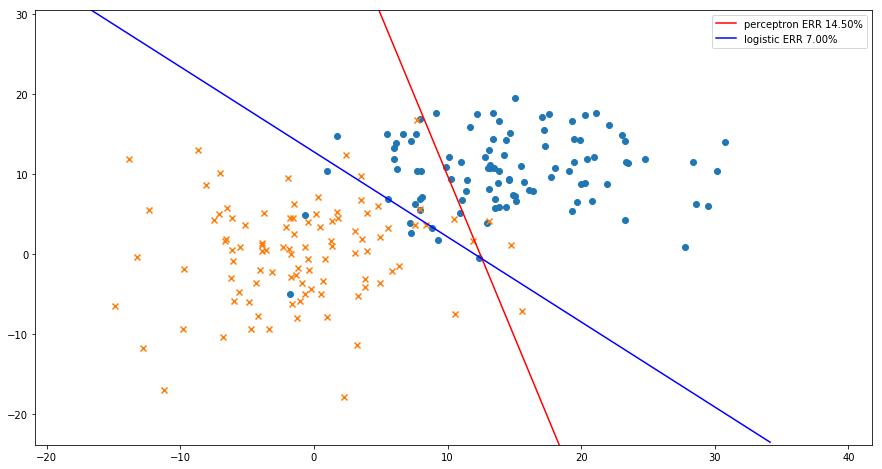

In [71]:
train_set=prepare_data(100,[15,10],30,100,[0,0],40)
perceptron=run_perceptron(train_set)
logistic=run_logistic(train_set)
fig=plt.figure(figsize=(15,8))
subplot=fig.add_subplot(1,1,1)
show_result(subplot,train_set,perceptron,logistic)

# 2. ROC曲线

按照模型的预测结果作如下划分，计算相关评价指标：
![PrecisionAndRecall](./data/learn_WML_chapter_5_PrecisionAndRecall.jpg "PrecisionAndRecall")
由此可以做ROC曲线(Receiver Operating Characterstic)，即以TPR为纵轴、FPR为横轴作TPR-FPT曲线；而ROC曲线映射下方的面积AUC(Area Under Curve)在一定程度上可以体现算法的性能。  
[WIKI关于precision和recall等概念的定义](https://en.wikipedia.org/wiki/Precision_and_recall)

In [95]:
def run_logistic_roc(train_set):
    w=np.array([[0],[0.1],[0.1]])
    phi=train_set[["x","y"]]
    phi["bias"]=1
    phi=phi.as_matrix(columns=["bias","x","y"])
    t=(train_set[["type"]]+1)*0.5  # change labels from 1,-1 to (1+1)*0.5=1,(-1+1)*0.5=0
    t=t.as_matrix()
    
    for i in range(100):
        y=np.array([])
        for line in phi:
            a=np.dot(line,w)
            y=np.append(y,[1.0/(1.0+np.exp(-a))])
        r=np.diag(y*(1-y))
        y=y[np.newaxis,:].T
        tmp1=np.linalg.inv(np.dot(np.dot(phi.T,r),phi))
        tmp2=np.dot(phi.T,(y-t))
        w_new=w-np.dot(tmp1,tmp2)
        if np.dot((w_new-w).T,(w_new-w))<0.001*np.dot(w.T,w):
            w=w_new
            break
        w=w_new
    # compute error
    err=0.0
    for index,point in train_set.iterrows():
        x,y,type=point.x,point.y,point.type
        a=np.dot(np.array([1,x,y]),w)
        p=1.0/(1.0+np.exp(-a))
        train_set.ix[index,"probability"]=p
        if (p-0.5)*type<0:
            err+=1
    err_rate=err*100/len(train_set)
    
    result=train_set.sort_values(by=["probability"],ascending=False).reset_index()
    
    return w[0],w[1],w[2],err_rate,result

def show_result_roc(subplot,train_se,logistic):
    train_set1=train_set[train_set["type"]==1]
    train_set2=train_set[train_set["type"]==-1]
    ymin,ymax=train_set.y.min()-5,train_set.y.max()+10
    xmin,xmax=train_set.x.min()-5,train_set.x.max()+10
    
    # data scatter
    subplot.set_xlim([xmin-1,xmax+1])
    subplot.set_ylim([ymin-1,ymax+1])
    subplot.scatter(train_set1.x,train_set1.y,marker="o",label=None)
    subplot.scatter(train_set2.x,train_set2.y,marker="x",label=None)
    
    # logistic
    linex=np.arange(xmin-5,ymax+5)
    w0,w1,w2,err_rate=logistic
    liney=-linex*w1/w2-w0/w2 # line f(x,y)=0, where f(x,y)=w0+w1*x+w2*y
    subplot.plot(linex,liney,label="logistic ERR {:.2f}%".format(err_rate),color="red")
    subplot.legend(loc=1)

def show_roc(subplot,result):
    positives=len(result[result["type"]==1])
    negatives=len(result[result["type"]==-1])
    tp=[0.0]*len(result)
    fp=[0.0]*len(result)
    for index,line in result.iterrows():
        for c in np.arange(0,len(result)):
            if index<c:
                if line.type==1:
                    tp[c]+=1
                else:
                    fp[c]+=1
    tp_rate=np.array(tp)/positives
    fp_rate=np.array(fp)/negatives
    
    subplot.set_xlim([0,1])
    subplot.set_ylim([0,1])
    subplot.set_xlabel("False positive rate, FPR")
    subplot.set_ylabel("True positive rate, TPR")
    subplot.set_title('ROC Curve')
    subplot.plot(fp_rate,tp_rate)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


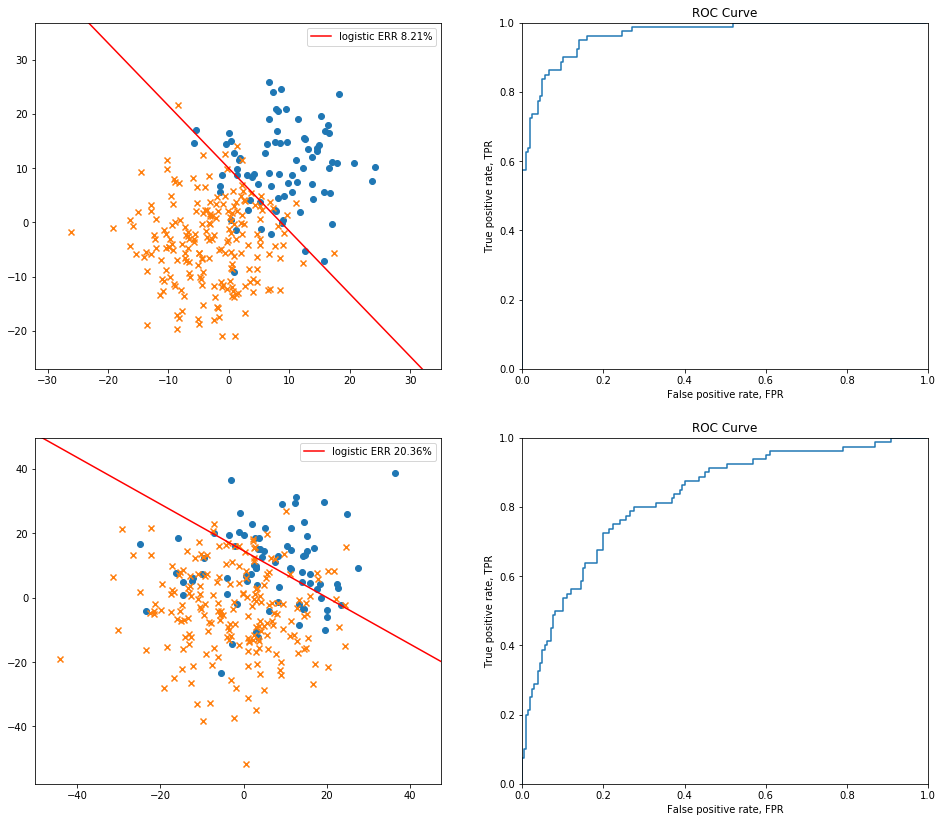

In [96]:
fig = plt.figure(figsize=(16,14))
# 第一组数据容易分开
train_set=prepare_data(80, [9,9], 50, 200, [-3,-3], 50)
logistic = run_logistic_roc(train_set)
subplot = fig.add_subplot(2,2,1)
show_result_roc(subplot, train_set, logistic=logistic[:-1])
subplot = fig.add_subplot(2,2,2)
show_roc(subplot, logistic[-1])
# 第二组数据不容易分开
train_set=prepare_data(80, [9,9], 150, 200, [-3,-3], 150)
logistic = run_logistic_roc(train_set)
subplot = fig.add_subplot(2,2,3)
show_result_roc(subplot, train_set, logistic=logistic[:-1])
subplot = fig.add_subplot(2,2,4)
show_roc(subplot, logistic[-1])

In [97]:
# 用sklearn内置方法画ROC曲线
from sklearn import metrics
def show_roc_sklearn(subplot,result):
    fpr,tpr,_=metrics.roc_curve(result.type,result.probability)
    auc_score=metrics.auc(fpr,tpr)
    subplot.set_xlim([0,1])
    subplot.set_ylim([0,1])
    subplot.set_xlabel("False positive rate, FPR")
    subplot.set_ylabel("True positive rate, TPR")
    subplot.set_title("ROC Curve(AUC={:.2f})".format(auc_score))
    subplot.plot(fpr,tpr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


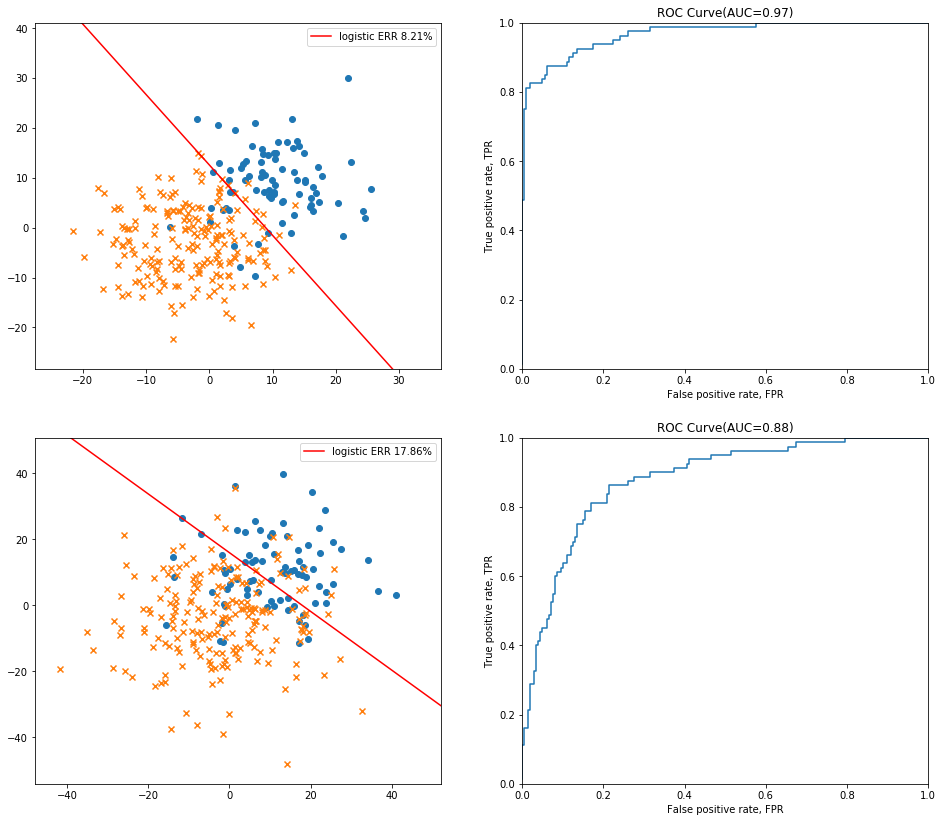

In [99]:
fig = plt.figure(figsize=(16,14))
# 第一组数据容易分开
train_set=prepare_data(80, [9,9], 50, 200, [-3,-3], 50)
logistic = run_logistic_roc(train_set)
subplot = fig.add_subplot(2,2,1)
show_result_roc(subplot, train_set, logistic=logistic[:-1])
subplot = fig.add_subplot(2,2,2)
show_roc_sklearn(subplot, logistic[-1])
# 第二组数据不容易分开
train_set=prepare_data(80, [9,9], 150, 200, [-3,-3], 150)
logistic = run_logistic_roc(train_set)
subplot = fig.add_subplot(2,2,3)
show_result_roc(subplot, train_set, logistic=logistic[:-1])
subplot = fig.add_subplot(2,2,4)
show_roc_sklearn(subplot, logistic[-1])

# 3. IRLS的数学推断

![IRLS_1](./data/learn_WML_chapter_5_IRLS_1.jpg "IRLS_1")
![IRLS_2](./data/learn_WML_chapter_5_IRLS_2.jpg "IRLS_2")
![IRLS_3](./data/learn_WML_chapter_5_IRLS_3.jpg "IRLS_3")